# 作業目標:

    使用CIFAR100, 數據集變大的影響
    
    
# 作業重點:¶

   了解 CIFAR100 跟 CIFAR10 數據及差異


In [179]:
import numpy
from keras.datasets import cifar100
import numpy as np
np.random.seed(100)

# 資料準備

In [180]:
(x_img_train,y_label_train), \
(x_img_test, y_label_test)=cifar100.load_data(label_mode='fine')

In [181]:
print('train:',len(x_img_train))
print('test :',len(x_img_test))

train: 50000
test : 10000


In [182]:
# 查詢檔案維度資訊
x_img_train.shape

(50000, 32, 32, 3)

In [183]:
# 查詢檔案維度資訊
y_label_train.shape

(50000, 1)

In [184]:
# 查詢檔案維度資訊
x_img_test.shape

(10000, 32, 32, 3)

In [185]:
# 查詢檔案維度資訊
y_label_test.shape

(10000, 1)

In [186]:
#針對物件圖像數據集的類別編列成字典

label_dict= {0:"beaver", 1:"dolphin", 2:"otter", 4:"whale aquarium", 3:"seal", 
 5:"fish",6:"flatfish", 7:"ray", 8:"shark", 9:"trout",             
10:"orchids",11:"poppies",12:"roses",14:"tulips",13:"sunflowers",
15:"bottles",16:"bowls",17:"cans",18:"cups",19:"plates",              
20:"apples",21:"mushrooms",22:"oranges", 24:"sweet peppers", 23:"pears", 
25:"clock", 26:"computer keyboard",27:"lamp",28:"telephone",29:"television",
30:"bed",31:"chair",32:"couch",34:"wardrobe",33:"table",
35:"bee ",36:"beetle",37:"butterfly",38:"caterpillar",39:"cockroach",        
40:"bear",41:"leopard",	  42:"lion",44:"wolf ",43:"tiger",
45:"bridge",46:"castle",47:"house",48:"road",49:"skyscraper",             
50:"cloud",51:"forest",52:"mountain",  54:"sea ",53:"plain",
55:"camel",56:"cattle",57:"chimpanze",58:"elephant",59:"kangaroo",         
60:"fox",61:"porcupine",62:"possum",64:"skunk",63:"raccoon",
65:"crab",66:"lobster",67:"snail",68:"spider",69:"worm",                   
70:"baby",71:"boy",72:"girl",74:"woman ",73:"man",
75:"crocodile ", 76:"dinosaur",77:"lizard",78:"snake",79:"turtle",                   
80:"hamster",81:"mouse",82:"rabbit",84:"squirrel",83:"shrew ",
85:"maple",86:"oak",87:"palm",88:"pine",89:"willow",                     
90:"bicycle",91:"bus",92:"motorcycle",94:"train",93:"pickup truck", 
95:"lawn-mower ",96:"rocket",97:"streetcar",98:"tank",99:"tractor"}

In [187]:
#導入影像列印模組
import matplotlib.pyplot as plt

#宣告一個影像標記的函數
def plot_images_labels_prediction(images,labels,prediction, idx,num=100):
    fig = plt.gcf()
    fig.set_size_inches(18, 21)
   # if num>25: num= 25
    for i in range(0, num):
        ax=plt.subplot(10,10, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

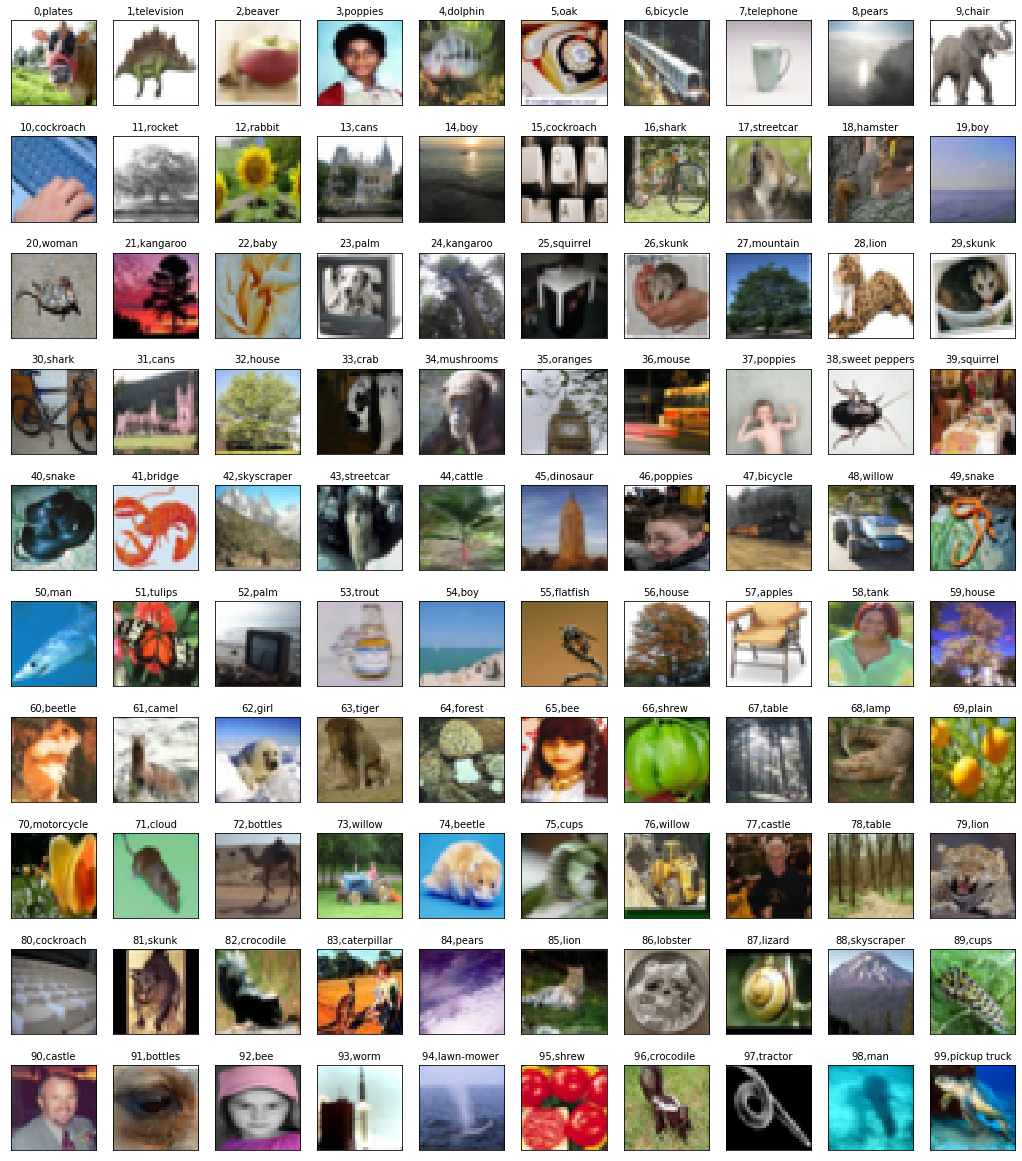

In [188]:
#針對不同的影像作標記
plot_images_labels_prediction(x_img_train,y_label_train,[],0)

#字典完全不對(需要時間修改)

# Image normalize 

In [189]:
x_img_train[0][0][0]

array([255, 255, 255], dtype=uint8)

In [190]:
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [191]:
x_img_train_normalize[0][0][0]

array([1., 1., 1.], dtype=float32)

# 轉換label 為OneHot Encoding

In [192]:
y_label_train.shape

(50000, 1)

In [193]:
y_label_train[:5]

array([[19],
       [29],
       [ 0],
       [11],
       [ 1]])

In [194]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [195]:
y_label_train_OneHot[:5]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0.